# PyTorch Computer Vision
Author: Ross Hunter

Date: 2025-10-05

* see reference materials - https://www.learnpytorch.io/03_pytorch_computer_vision/

* Make sure to read the PyTorch Torchvision documentation for about an hour. Ex. 10 minutes per section on the documentation.


## 0. Computer vision libraries in PyTorch

* [`torchvision`] - the base domain library for PyTorch computer vision.
* `torchvision.datasets` - get datasets and data loading functions for computer vision here.
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems.
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with a ML model.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoaders` - Creates a Python iterable over a dataset.

In [ ]:
# Import PyTorch
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"Torch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

Torch version: 2.8.0+cu126
Torchvision version: 0.23.0+cu126


## 1. Getting a dataset
The dataset we will be using is Fashion MNIST from torchvision.datasets
Torchvision has built in data sets to practice on.



In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # destination
    train=True, # get the training dataset instead of the test dataset
    download=True,
    transform=ToTensor(), # transform the images into tensors (put the data in 0 to 1 format rather than the original 0 to 255 format used in the images.)
    target_transform=None # do we want to transform the labels? no
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.02MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.6MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_chanels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_chanels, height, width]
Image label: Ankle boot


### Visualizing our data

Image shape: torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

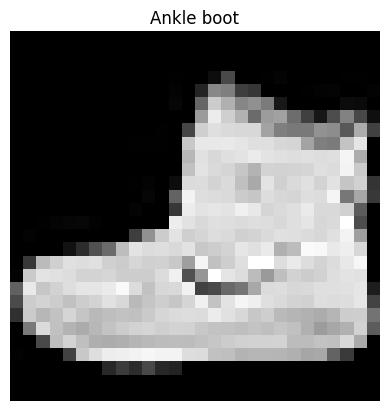

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

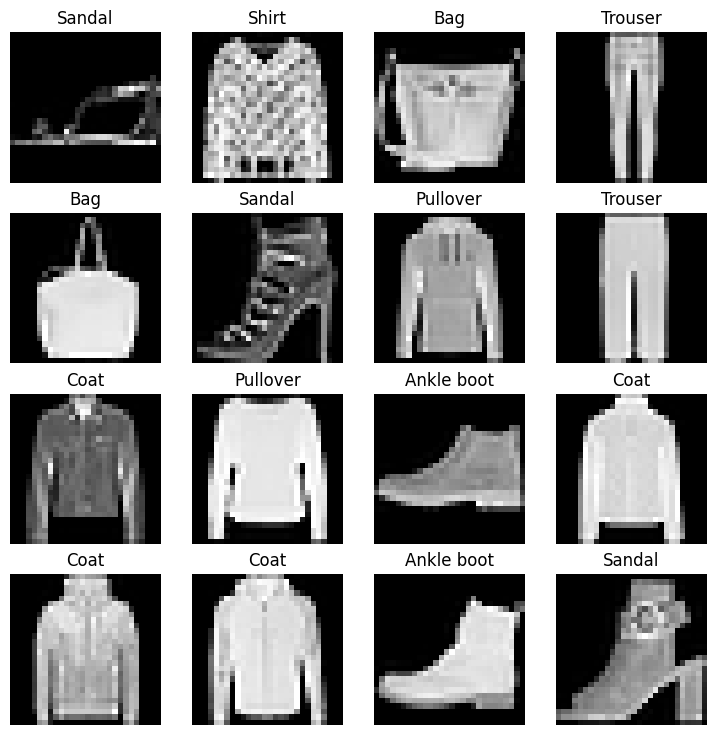

In [ ]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in your computer hardware may not be able to look at 60,000 images in one hit, so we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

Mini-batch gradient descent from Andrew: https://www.youtube.com/watch?v=4qJaSmvhxi8

In [ ]:
# Turn the dataset into a DataLoader
from torch.utils.data import DataLoader

# Setup our hyperparameters
BATCH_SIZE = 32
SHUFFLE = True

# Turn the datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=SHUFFLE)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [ ]:
def plot_dataloader_preview(source_dataloader: DataLoader, start_index: int, label=None) -> None:
  """
  Plot a preview of source_dataloader, and the batch at the specified start_index.
  """
  # Plot more images
  #torch.manual_seed(42)
  fig = plt.figure(figsize=(9, 9))
  if(label != None):
    fig.suptitle(label)
  rows, cols = 4, 4
  current_iteration = 0
  for batch_index, batch in enumerate(source_dataloader,
                                      start=start_index):
    if current_iteration > 0:
      break
    images, labels = batch
    for sample_index in range(0, rows * cols):
      # print(f"Index: {sample_index}")
      img, label = images[sample_index], labels[sample_index]
      fig.add_subplot(rows, cols, sample_index + 1)
      plt.imshow(img.squeeze(), cmap="gray")
      plt.title(class_names[label])
      plt.axis(False)
    current_iteration += 1

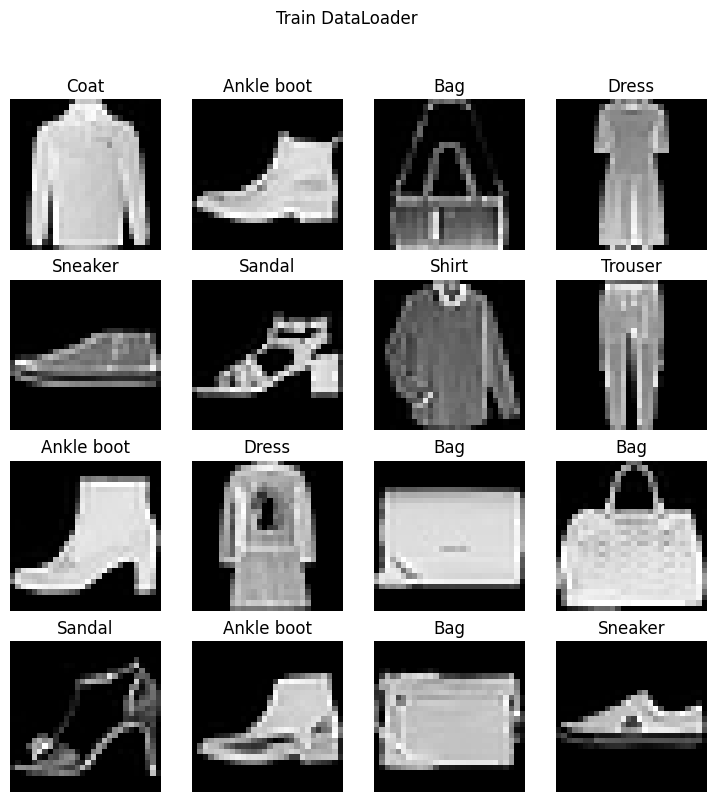

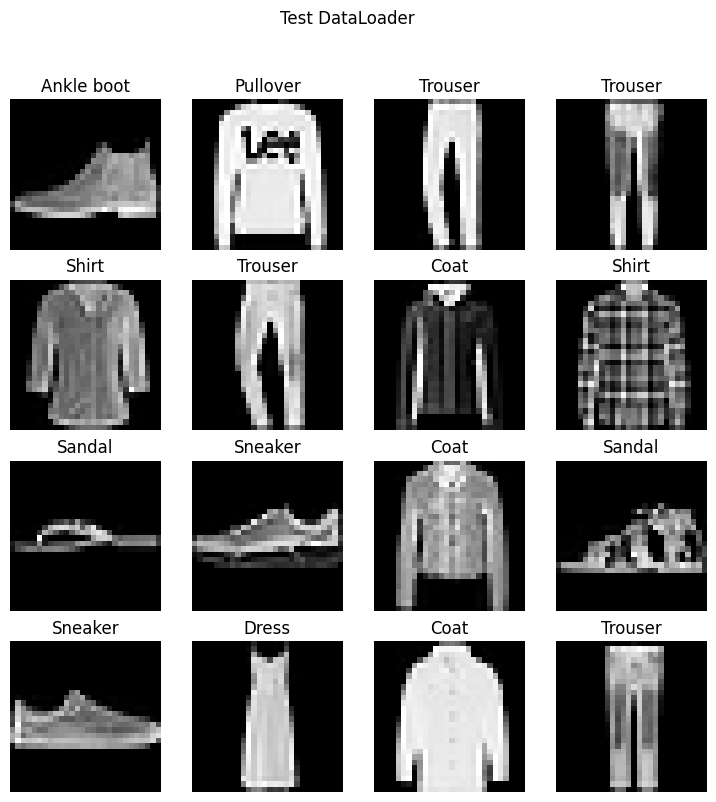

In [ ]:
plot_dataloader_preview(train_dataloader, 0, label="Train DataLoader")
plot_dataloader_preview(test_dataloader, 0, label="Test DataLoader")

In [ ]:
# Let's check out what we've created
#print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")


Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
# Check out what's inside the training dataloader
# use destructuring to break out the features and labels into two sets.
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


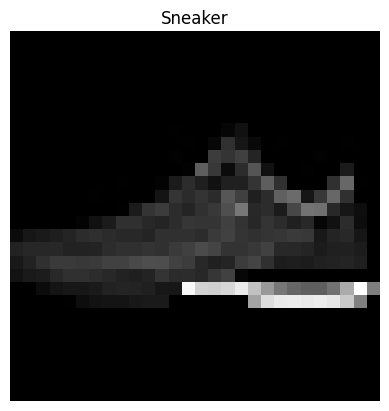

In [ ]:
# Show a sample
# torch.manual_seed(42)
random_index = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model.

When starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and then improve upon with subsequent models and experiments.

In other words: start simply and add complexity when necessary.

In [ ]:
# Create a flatten later
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Compare the results of both
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape))
  def forward(self, x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28, # the rows and columns of image pixels.
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# Test the model with some dummy data
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric  - since we're working on a classification problem, let's use accuracy as our evaluation metric.

### Download helper_functions.py

In [ ]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
  print(f"helper_functions.py already exists, skipping download.")
else:
  print(f"Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as file:   # "wb" = write binary permissions
    file.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

### Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values, etc.)
2. How fast it runs.

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """
  Prints difference between start and end time.
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
# Template for measuring model training time:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.4281000000978565e-05

### Creating a training loop and training a model on batches of data.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop.
# Wrap the iterater with tqdm to set up tqdm (progress bar)
for epoch in tqdm(range(epochs)):
  print(f"Epoch #: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_predictions = model_0(X)
    # 2. Calculate loss
    loss = loss_fn(y_predictions, y)
    train_loss += loss # accumulate the losses for each batch in the current epoch
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward - backpropagation
    loss.backward()
    # 5. Optimizer step step stepppp. Update the params
    # once per batch rather than once per epoch for more efficiency.
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Get the average train loss per batch for this epoch.
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_predictions = model_0(X_test)
      test_loss += loss_fn(test_predictions, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_predictions.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test Loss: 0.5095, Test Acc: 82.0387
Epoch #: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test Loss: 0.4799, Test Acc: 83.1969
Epoch #: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test Loss: 0.4766, Test Acc: 83.4265
Train time on cpu: 31.755 seconds


### 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, accuracy = 0, 0
  model.eval()
  with torch.inference_mode():
    # Loop through all the batches.
    for X, y in tqdm(data_loader):
      # Make predictions
      y_predictions = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_predictions, y)
      accuracy += accuracy_fn(y_true=y,
                              y_pred=y_predictions.argmax(dim=1))
    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    accuracy /= len(data_loader)

  # return a dictionary
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": accuracy}

def print_eval_model(model_results_dict: dict):
  """For use with eval_model(). Print the results of eval_model()."""
  print(f"Model Name: {model_0_results['model_name']}\n"
      + f"Model Loss: {model_0_results['model_loss']:.2f}\n"
      + f"Model Accuracy: {model_0_results['model_acc']:.2f}%\n")

In [ ]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
print_eval_model(model_0_results)

  0%|          | 0/313 [00:00<?, ?it/s]

Model Name: FashionMNISTModelV0
Model Loss: 0.48
Model Accuracy: 83.43%



## Model 1: Refactor and improve the model.

### Setup Device-Agnostic Code

In [ ]:
# Setup device-agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"

### Create a new model that runs on the GPU and includes non-linear layers.

In [ ]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector.
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(), # generally you follow up a linear function with a non-linear function, although that rule is not set in stone.
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU())

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
from helper_functions import accuracy_fn # type: ignore
# make a loss function and an optimizer for model_1
# Working with classification problems so CrossEntropyLoss()
# is a typical good choice.
loss_fn = nn.CrossEntropyLoss()
# Oops! I didn't realize I was using the wrong model params because I didn't
# set up a new optimizer function for model_1. It was using model_0 params
# from the old version above. Make sure to always pass the current model
# params to the optimizer!
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Write functions for train_step and test_step

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

def train_step(model: torch.nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Perform a training step using the data from train_dataloader"""
  train_time_start_on_gpu = timer()
  ### Training
  model.train()
  train_loss, train_acc = 0, 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    # move the data to the device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_predictions = model(X)
    # 2. Calculate loss
    loss = loss_fn(y_predictions, y)
    train_loss += loss # accumulate the losses for each batch in the current epoch
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_predictions.argmax(dim=1)) # convert logist to prediction labels
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward - backpropagation
    loss.backward()
    # 5. Optimizer step step stepppp. Update the params
    # once per batch rather than once per epoch for more efficiency.
    optimizer.step()

  # Get the average train loss per batch for this epoch.
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  # Calculate training time
  train_time_end_on_gpu = timer()
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=str(next(model.parameters()).device))

def test_step(model: torch.nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Perform a testing step using the data from test_dataloader"""
  # Save the start time.
  test_time_start_on_gpu = timer()
  ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  # Put torch into prediction mode.
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # move the data to the device
      X_test, y_test = X_test.to(device), y_test.to(device)
      # get the raw logits
      test_predictions = model(X_test)
      test_loss += loss_fn(test_predictions, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                                y_pred=test_predictions.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)
    # Print out what's happening
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

  # Save the end time.
  test_time_end_on_gpu = timer()
  total_test_time = print_train_time(start=test_time_start_on_gpu,
                                            end=test_time_end_on_gpu,
                                            device=str(next(model.parameters()).device))

### Training loop for model_1

In [ ]:
# Set the seed
torch.manual_seed(42)

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3
# Create training and test loop.
total_train_time_start_model_1 = timer()
# Wrap the iterater with tqdm to set up tqdm (progress bar)
for epoch in tqdm(range(epochs)):
  print(f"Epoch: #{epoch}\n--------")
  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
  test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)
  print("\n")

total_train_time_end_model_1 = timer()
total_train_time_model_1 = print_train_time(start=total_train_time_start_model_1,
                                            end=total_train_time_end_model_1,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: #0
--------
Train loss: 1.11456 | Train acc: 58.46%
Train time on cpu: 10.729 seconds
Test Loss: 0.9632, Test Acc: 63.41%
Train time on cpu: 1.155 seconds


Epoch: #1
--------
Train loss: 0.90905 | Train acc: 64.87%
Train time on cpu: 9.840 seconds
Test Loss: 0.7454, Test Acc: 72.61%
Train time on cpu: 1.164 seconds


Epoch: #2
--------
Train loss: 0.59506 | Train acc: 78.26%
Train time on cpu: 9.833 seconds
Test Loss: 0.4953, Test Acc: 82.68%
Train time on cpu: 1.150 seconds


Train time on cpu: 33.920 seconds


#### Note on compute performance
*Note:* Sometimes, depending on your data/hardware, you might find that your model trains faster on CPU than GPU.

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

See more at: https://horace.io/brrr_intro.html

### Improved version of eval_model function.

In [ ]:
# Create a new device agnostic version of the eval_model function.
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, accuracy = 0, 0
  model.eval()
  with torch.inference_mode():
    # Loop through all the batches.
    for X, y in tqdm(data_loader):
      # move the data to the target device
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_predictions = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_predictions, y)
      accuracy += accuracy_fn(y_true=y,
                              y_pred=y_predictions.argmax(dim=1))
    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    accuracy /= len(data_loader)

  # return a dictionary
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": accuracy}

def print_eval_model(model_results_dict: dict):
  """For use with eval_model(). Print the results of eval_model()."""
  print(f"Model Name: {model_results_dict['model_name']}\n"
      + f"Model Loss: {model_results_dict['model_loss']:.2f}\n"
      + f"Model Accuracy: {model_results_dict['model_acc']:.2f}%\n")

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
print_eval_model(model_1_results)
print_eval_model(model_0_results)

  0%|          | 0/313 [00:00<?, ?it/s]

Model Name: FashionMNISTModelV1
Model Loss: 0.50
Model Accuracy: 82.68%

Model Name: FashionMNISTModelV0
Model Loss: 0.48
Model Accuracy: 83.43%



## Model 2: Building a Convolutional Neural Network (CNN)

CNNs are known for their capabilities to find patterns in visual data.

We are going to replicate the TinyVGG model from the CNN Explainer website.

For info about CNNs, see: https://poloclub.github.io/cnn-explainer/

https://en.wikipedia.org/wiki/Dot_product


In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicate the TinyVGG
  model from CNN explainer website.

  Args:
    input_shape: the number of color chanels in the image.
    hidden_units: the number of hidden units in each layer of the model.
    output_shape: the number of categories in the classification problem.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Feature extractor layers
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Hyperparameters of nn.Conv2d
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    # Flatten the outputs into a single feature vector.
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # hidden_units* match the shape of X after it goes through flatten.
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    #print(f"The shape after going through the first block: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"The shape after going through the seccond block: {x.shape}")
    x = self.classifier_layer(x)
    #print(f"The shape after going through the classification layer: {x.shape}")
    return x



In [ ]:
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

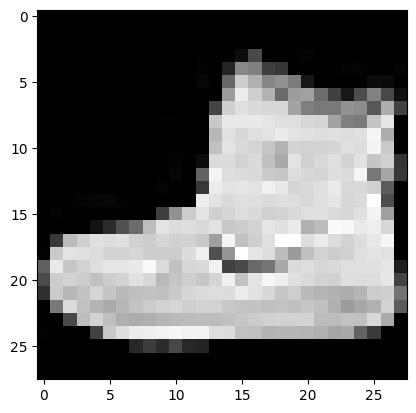

In [ ]:
plt.imshow(image.squeeze(dim=0), cmap="gray")

In [ ]:
#result = model_2(image)
#result.shape

### Stepping through `nn.Conv2d()`

Documentation: https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(42)
# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
#conv_output

In [ ]:
#test_image.shape, test_image.unsqueeze(0).shape
conv_output.shape

torch.Size([10, 64, 64])

### Stepping through `nn.MaxPool2D`

Documentation: https://docs.pytorch.org/docs/2.8/generated/torch.nn.MaxPool2d.html

Notes: you're trying to compress the patterns into a feature vector (the output)

going from a higher dimensional space to a smaller dimensionality space, but the smaller dimensionality space still represents the original tensor.

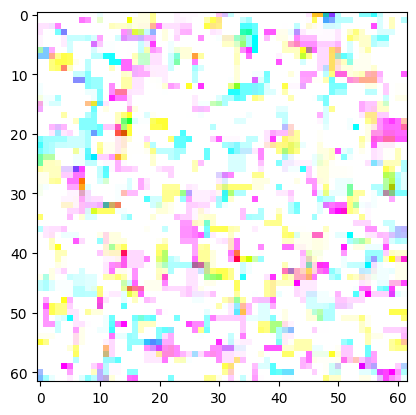

In [ ]:
torch.manual_seed(42)
maxpool2d_layer = nn.MaxPool2d(kernel_size=3,
                               stride=1)
maxpool2d_output = maxpool2d_layer(test_image)
maxpool2d_output = maxpool2d_output.permute(1, 2, 0) #permute so that the data is now Rows x Cols x Color Channels
maxpool2d_output.shape
plt.imshow(maxpool2d_output, cmap="autumn")

In [ ]:
torch.manual_seed(42)
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=3)

# Create a sample nn.Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through the conv_layer: {test_image_through_conv.shape}")

# Pass the conv_layer output through the max_pool_layer
test_image_through_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going thorugh the conv_layer and max_pool_layer: {test_image_through_maxpool.shape}")



Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through the conv_layer: torch.Size([1, 10, 64, 64])
Shape after going thorugh the conv_layer and max_pool_layer: torch.Size([1, 10, 21, 21])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1, 1, 2, 2))
test_maxpool_layer = nn.MaxPool2d(kernel_size=1)
test_output = test_maxpool_layer(random_tensor)
print(f"Output tensor shape: {test_output.shape}")
random_tensor.shape, test_output.shape

Output tensor shape: torch.Size([1, 1, 2, 2])


(torch.Size([1, 1, 2, 2]), torch.Size([1, 1, 2, 2]))

### Set up loss function and optimizer

In [ ]:
# Setup loss function, eval metrics, and optimizer
from helper_functions import accuracy_fn #type: ignore

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


### Training loop for model_2

In [ ]:
# seed
torch.manual_seed(42)

# epochs
epochs = 3

# timer
start_time = timer()

# epochs loop with tqdm progress bar.
for epoch in tqdm(range(epochs)):
  print(f"Epoch: #{epoch}\n-------")
  # call train and test functions
  train_step(model=model_2,
             train_dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  print("\n")

# end timer
end_time = timer()

# calculate total train time with helper function
total_train_time_model_2 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: #0
-------
Train loss: 0.68383 | Train acc: 75.17%
Train time on cpu: 57.420 seconds
Test Loss: 0.3912, Test Acc: 86.15%
Train time on cpu: 5.048 seconds


Epoch: #1
-------
Train loss: 0.36017 | Train acc: 87.00%
Train time on cpu: 55.446 seconds
Test Loss: 0.3479, Test Acc: 87.38%
Train time on cpu: 4.053 seconds


Epoch: #2
-------
Train loss: 0.32436 | Train acc: 88.25%
Train time on cpu: 55.369 seconds
Test Loss: 0.3236, Test Acc: 88.41%
Train time on cpu: 4.945 seconds


Train time on cpu: 182.420 seconds


### Evaluating model_2

In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3236110210418701,
 'model_acc': 88.40854632587859}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Comparing the models

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.495337,82.677716
2,FashionMNISTModelV2,0.323611,88.408546


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,31.754756
1,FashionMNISTModelV1,0.495337,82.677716,33.920337
2,FashionMNISTModelV2,0.323611,88.408546,182.420393


Text(0, 0.5, 'model name')

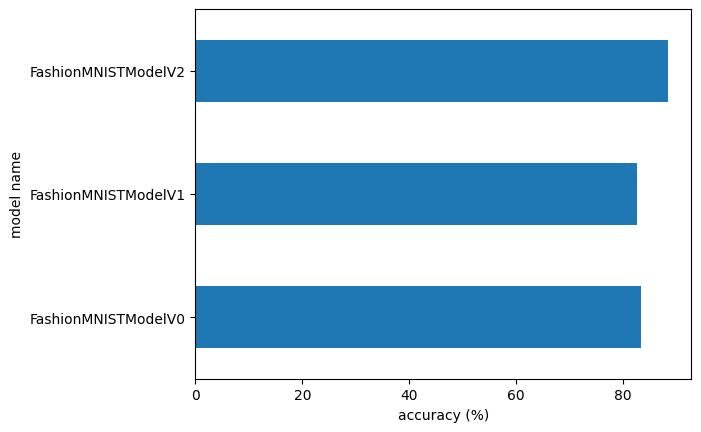

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model name")

## Make and evaluate random predictions with the best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device) # make sure the model and data are on the same device
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device) # make sure the model and data are on the same device.
      # forward pass
      pred_logit = model(sample)

      # convert logits to prediction probabilities
      prediction_probability = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(prediction_probability.cpu())

  return torch.stack(pred_probs)





In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

Text(0.5, 1.0, 'Sandal')

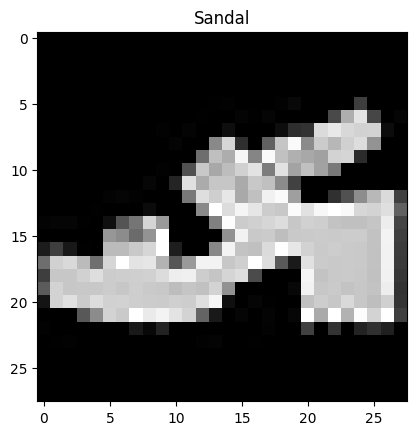

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
# View first two prediction probabilities
pred_probs[:2]

tensor([[1.4109e-07, 3.6590e-10, 9.7771e-10, 4.5011e-09, 2.7544e-09, 9.9992e-01,
         1.3535e-06, 2.8636e-08, 3.1006e-06, 7.6485e-05],
        [1.3885e-01, 6.9767e-01, 3.4006e-03, 6.8652e-02, 5.4351e-02, 2.9392e-04,
         3.6383e-02, 7.8869e-05, 1.0945e-04, 2.1209e-04]])

Text(0.5, 1.0, 'Predicted label: Sandal')

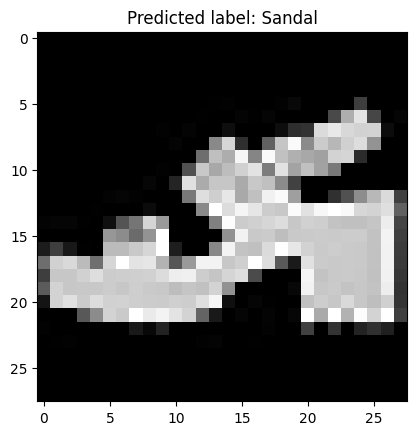

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(f"Predicted label: {class_names[pred_probs[0].argmax()]}")

In [ ]:
# Convert prediction probabilities to labels
pred_labels = pred_probs.argmax(dim=1)
pred_labels

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

## Visualize the predictions

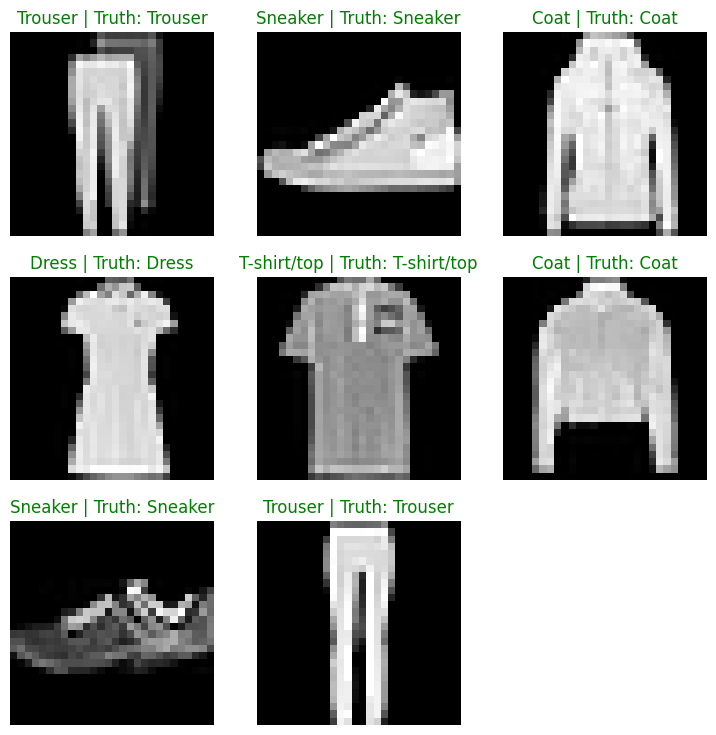

In [ ]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, len(test_samples)):
  #random_index = torch.randint(0, len(train_data), size=[1]).item()
  img = test_samples[i]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")

  pred_label = class_names[pred_labels[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"{pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, color="green")
  else:
    plt.title(title_text, color="red")

  plt.axis(False)

## Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually.

https://www.learnpytorch.io/03_pytorch_computer_vision/#10-making-a-confusion-matrix-for-further-prediction-evaluation

1. Make predictions with our tranined model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

https://www.google.com/books/edition/Machine_Learning_with_PyTorch_and_Scikit/SVxaEAAAQBAJ?hl=en&gbpv=1&printsec=frontcover



In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

#
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 3, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Note: It's possible to install libraries to your
# google drive to avoid having to download them every time.
try:
  import mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19 or mlxtend.__version__.split(".")[0] > 0, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"torchmetrics version: {torchmetrics.__version__}")
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 5.2 MB/s eta 0:00:00
torchmetrics version: 1.8.2
mlxtend version: 0.23.4


In [ ]:
mlxtend.__version__

'0.23.4'

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_data.targets, len(test_data.targets), test_data.classes

(tensor([9, 2, 1,  ..., 8, 1, 5]),
 10000,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

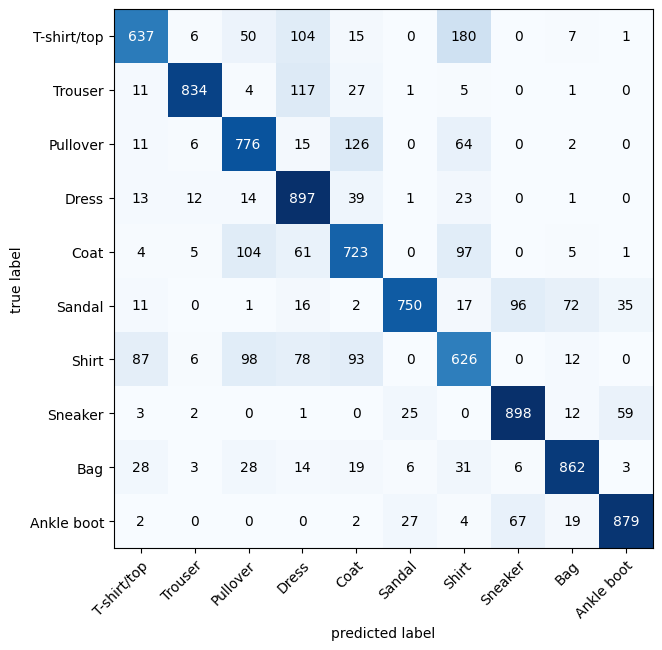

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmatrix = ConfusionMatrix(num_classes=len(class_names),
                             task="multiclass")
confmat_tensor = confmatrix(preds=y_pred_tensor,
                            target=test_data.targets)

# 3. Plot the confusion matrix
fig, axis = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                  class_names=class_names,
                                  figsize=(10,7))

## Save and load best performing model

In [ ]:
from pathlib import Path
# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance. Set it up with the same shape so we don't get a shape mismatch error.
model_2_new_instance = FashionMNISTModelV2(input_shape=1, # number of color channels
                                           hidden_units=10,
                                           output_shape=len(class_names))
# Load the state dict into the new instance
model_2_new_instance.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
model_2_new_instance.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3236110210418701,
 'model_acc': 88.40854632587859}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

model_2_new_instance_results = eval_model(
    model=model_2_new_instance,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_new_instance_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3236110210418701,
 'model_acc': 88.40854632587859}

In [ ]:
# Check if model results are close to each other. isclose() has a tolerance parameter that can be adjusted if necessary.
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(model_2_new_instance_results["model_loss"]))

tensor(True)